In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Bank dataset 

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

In [ ]:
data= pd.read_csv('/content/bank.csv')

In [ ]:
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [ ]:
data.tail()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
510,511,337,140,111,2640,694
511,512,168,131,60,2640,524
512,513,333,86,108,2850,676
513,514,192,176,34,2760,505
514,515,331,186,97,2700,767


In [ ]:
print('Shape of the dataset is',data.shape)
print('Dimension of the bank dataset is', data.ndim)

Shape of the dataset is (515, 6)
Dimension of the bank dataset is 2


In [ ]:
'''

Demand Draft Amount	Demand Draft Charges
Up to Rs. 5,000	- Rs. 25
Rs. 5,000 to Rs. 10,000 -	Rs. 50
Rs. 10,000 to Rs. 1 lakh -	Rs. 5 per thousand or part thereof. (Minimum Rs. 60)
Above Rs. 1 lakh	- Rs. 4 per thousand or part thereof. (Minimum Rs. 600 and maximum Rs. 2,000)

'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB



Onservation:

There are 515 entries with 6 features including:

1. Bank Number
2. Demand draft 
3. Withdrawals
4. Deposits
5. Branch area in sqft
6. Avg daily walkins

In [ ]:
data.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


Observation:

1. It can be observed that the data is normally distributed for avg daily walkins, left skewed for branch area in sqft, right skewed for deposits which can be visualised via histogram.
2. As the feature branch area in sqft is in different scale than others we require to do feature scaling.


In [ ]:
print('1.','There are',data.isnull().any().sum(), 'null values in the dataset')
print('2.', 'There are', data.duplicated().any().sum(), 'duplicated values in the dataset')

1. There are 0 null values in the dataset
2. There are 0 duplicated values in the dataset


In [ ]:
df = data.iloc[:,[1,2,3,4,5]]
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579
...,...,...,...,...,...
510,337,140,111,2640,694
511,168,131,60,2640,524
512,333,86,108,2850,676
513,192,176,34,2760,505


##Univariate Analysis

In [ ]:
feature = ['DD','Withdrawals','Deposits','Branch Area in sqft','avg daily walkins']

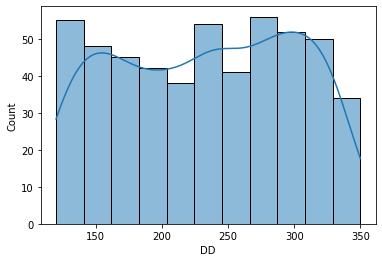

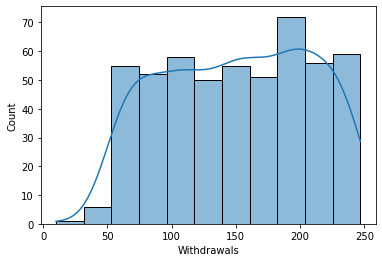

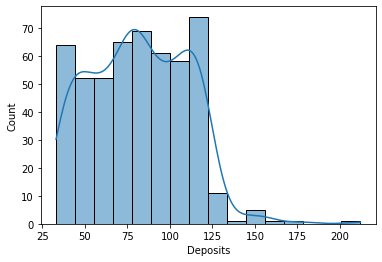

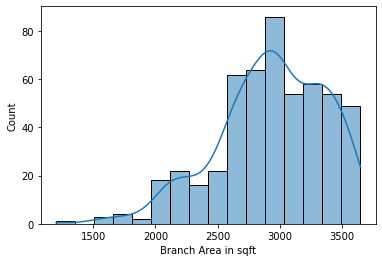

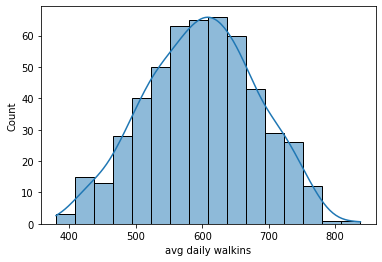

In [ ]:
# BarPlots

for i in feature:
  sns.histplot(data=df, x=df[i], kde=True)
  plt.show()

Observation:

1. Deposits and Branch Area in sqft are the features which are skewed.
2. Avg. daily walkins is normally distributed.
3. Majority of the banks observe < 123 deposits per day.
4. People in range 50 - 250 go for cash withdrawal per day.
5. On an average 600 people visits bank per day.
6. Majorly the area in which the banks are built is in range 2600 - 3500 sqft.

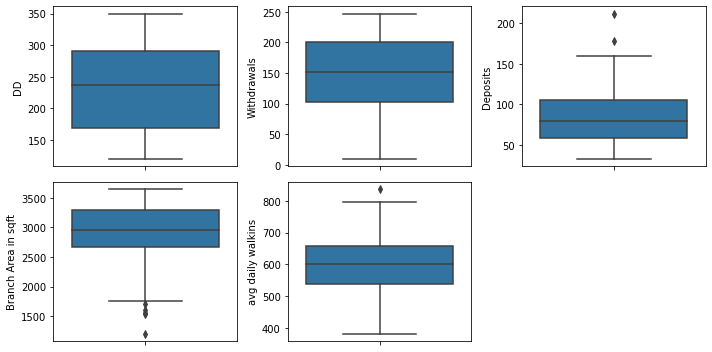

In [ ]:
 #BOXPLOT

fig, axs = plt.subplots(figsize=(10,5))

for i in range(5):
  plt.subplot(2,3,i+1)
  sns.boxplot(data = df, y =feature[i])
  plt.tight_layout()

Observation:

1. Withdrawal, Deposits, Bank area and avg daily walkins have some of the extreme values which are outliers.

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = np.percentile(col,[25,75])
  IQR = Q3 - Q1
  lower = Q1 - (1.5* IQR)
  upper = Q3 + (1.5*IQR)
  return lower,upper

for column in df.columns:
  if df[column].dtype == 'int64':
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

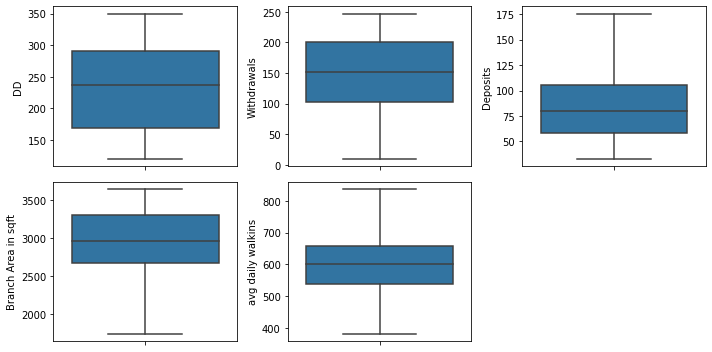

In [ ]:
feature = ['DD','Withdrawals','Deposits','Branch Area in sqft','avg daily walkins']

fig, axs = plt.subplots(figsize=(10,5))

for i in range(5):
  plt.subplot(2,3,i+1)
  sns.boxplot(data = df, y =feature[i])
  plt.tight_layout()

The outliers in the data has been treated.

BIVARIATE ANALYSIS

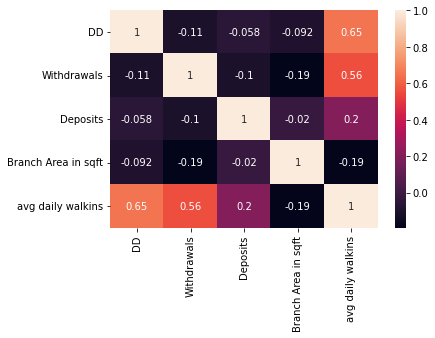

In [ ]:
#Heatmap

sns.heatmap(df.corr(),annot=True)

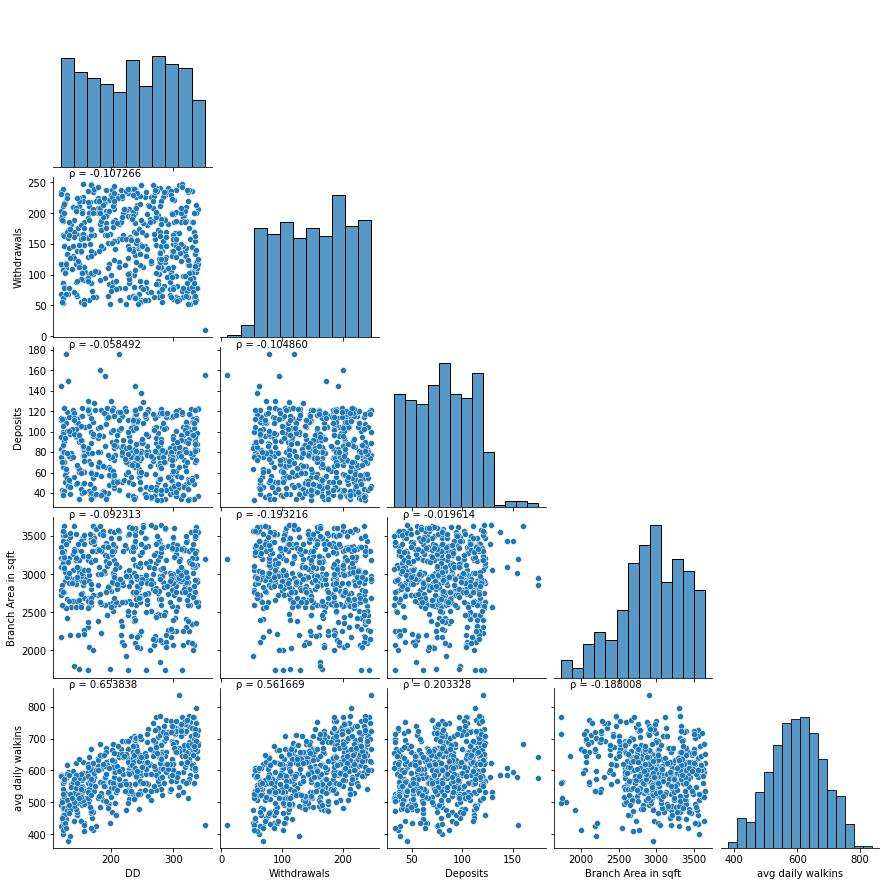

In [ ]:
#Pairplot
from scipy.stats import pearsonr


def corrfunc(x, y, ax=None, **kws):
  r,_= pearsonr(x,y)
  ax= ax or plt.gca()
  ax.annotate(f'ρ = {r:2f}',xy = (.1,1), xycoords=ax.transAxes)

g= sns.pairplot(df, corner=True)
g.map_lower(corrfunc)
plt.show()

Via heatmap and pairplot we can say that DD and withdrawal has somewhat relation with respect to avg. daily walkins.

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaling using standardization method

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.039436,-1.109135,0.484354
1,-1.640819,-1.138113,-0.587537,1.333376,-1.949581
2,1.107586,-0.029788,-0.198478,-0.853253,0.844049
3,0.281562,-0.680709,1.676078,1.659044,0.292517
4,-0.874870,-0.276082,1.640709,1.077494,-0.235036
...,...,...,...,...,...
510,1.573163,-0.188120,1.039436,-0.690419,1.143795
511,-0.964982,-0.346452,-0.764382,-0.690419,-0.894476
512,1.513088,-1.138113,0.933329,-0.201916,0.927978
513,-0.604535,0.445209,-1.683976,-0.411275,-1.122283


As the observations scales vary the data is supposed to undergo scaling so that the observations lie in the same scale.



In [ ]:
df.describe()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,5.150000e+02,5.150000e+02,5.150000e+02,5.150000e+02,5.150000e+02
mean,-1.379695e-16,-2.207511e-16,-1.310710e-16,1.241725e-16,-1.034771e-17
std,1.000972e+00,1.000972e+00,1.000972e+00,1.000972e+00,1.000972e+00
min,-1.685875e+00,-2.475141e+00,-1.719345e+00,-2.789815e+00,-2.621012e+00
25%,-9.424540e-01,-8.390411e-01,-8.351204e-01,-6.090017e-01,-7.326136e-01
50%,7.130193e-02,2.298977e-02,-5.700246e-02,5.396560e-02,2.874067e-02
75%,8.823066e-01,8.674282e-01,8.272225e-01,8.448739e-01,7.061661e-01
max,1.768404e+00,1.694274e+00,3.320737e+00,1.659044e+00,2.864336e+00


After scaling the values, mean of the data is observed to be at 0 and standard deviation is around 1. This way of scaling where the mean value comes down to 0 and the observations to fall under one standard deviation is called as Standardization.

#K means

Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.

The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: place a new centroid of each cluster.

Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

 Diagrammatic Implementation of K Means Clustering:

STEP 1:

Let’s choose number k of clusters, i.e., K=2, to segregate the dataset and to put them into different respective clusters. We will choose some random 2 points which will act as centroid to form the cluster.

STEP 2: 

Now we will assign each data point to a scatter plot based on its distance from the closest K-point or centroid. It will be done by drawing a median between both the centroids. 

STEP 3:

 points left side of the line is near to blue centroid, and points to the right of the line are close to the yellow centroid. The left one Form cluster with blue centroid and the right one with the yellow centroid.

STEP 4:

repeat the process by choosing a new centroid. To choose the new centroids, we will find the new center of gravity of these centroids, which is depicted below :

STEP 5:

 Next, we will reassign each datapoint to the new centroid. We will repeat the same process as above (using a median line). The yellow data point on the blue side of the median line will be included in the blue cluster

##K Means Clustering 2

STEP 6:

As reassignment has taken place, so we will repeat the above step of finding new centroids.

##K Means Clustering step 6

STEP 7:

 We will repeat the above process of finding the center of gravity of centroids, as being depicted below

##K Means Clustering step 7
STEP 8: 

After Finding the new centroids we will again draw the median line and reassign the data points, like the above steps.

##K Means Clustering step 8
STEP 9:

 We will finally segregate points based on the median line, such that two groups are being formed and no dissimilar point to be included in a single group

##K Means Clustering step 9
The final Cluster being formed are as Follows:

Cluster


Choosing The Right Number Of Clusters
The number of clusters that we choose for the algorithm shouldn’t be random. Each and Every cluster is formed by calculating and comparing the mean distances of each data points within a cluster from its centroid.

We Can Choose the right number of clusters with the help of the Within-Cluster-Sum-of-Squares (WCSS) method.

WCSS Stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.

The main idea is to minimize the distance between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.

 

To find the optimal value of clusters, the elbow method follows the below steps:

1. Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).

2. For each value of K, calculates the WCSS value.

3. Plots a graph/curve between WCSS values and the respective number of clusters K.

4. The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K

within cluster sum of sqaure values for various k values : 
 [2574.999999999999, 1943.260781639944, 1592.9912708771208, 1376.4504504699566, 1218.7755828366683, 1120.400061583686, 1019.9514121223824, 939.2912712356651, 886.4836672160549, 841.9296886852242, 790.3241567377156]


K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]




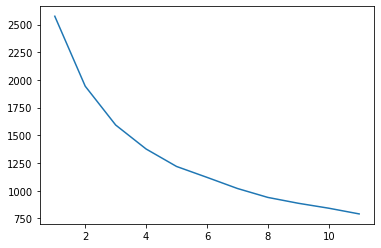

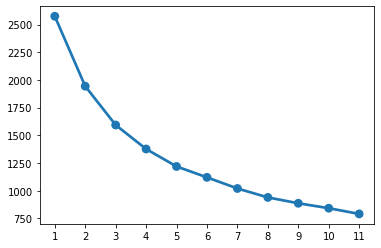

In [ ]:
#for getting the elbow plot, that will help to choose the apt k value, we will pass wcss value for multiple k values
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

wcss = []                                      #here we are passing a blank list for multiple within cluster sum of sqauare values
for i in range(1,12,1):                        #for various k values
  kmean=KMeans(n_clusters=i, random_state=1)   #pass values for KMeans algorithm
  kmean.fit_predict(df)                        #predict the clusters to which the observations corresponds to
  wcss.append(kmean.inertia_)                  #add the values of within cluster sum of square into the blank list created for the same

print('within cluster sum of sqaure values for various k values :', '\n',wcss)

print('\n')

a= []                                          #empty list created for various k values

for i in range(1,12):
  a.append(i)
print('K values:',a)

print('\n')

plt.plot(a,wcss)                               #plot a vs wcss called as elbow plot to obtain apt k value using matplotlib library
plt.show() 

print('\n')

sns.pointplot(a,wcss)                          #plot a vs wcss called as elbow plot to obtain apt k value using seaborn library
plt.show()

Observation:

From the elbow plot we can observe that the apt values for k are 2,3,4.

SILHOUTTE SCORE

The silhouette score falls within the range [-1, 1]. The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

In [ ]:
#now that we have our apt k value which can be assessed based on the elbow observed in the plot. Here, we have 3 elbows = K=2, K=3, K=4.
#in order to understand which of the k value is able to seggregate the observation in a much better way we will perform silhouette score test.
'''

silhouette score falls in the range of [-1,1].
The silhouette score of 1 means that the clusters are very dense and nicely separated.
The score of 0 means that clusters are overlapping. 
The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

'''

#SILHOUETTE SCORE

from sklearn.metrics import silhouette_score,silhouette_samples

k_value = [2,3,4]
for i in k_value:
  kmean = KMeans(n_clusters=i, random_state=1)
  label = kmean.fit_predict(df)
  sil_score = silhouette_score(df, label, random_state=1)
  if sil_score == 1:
    print('sil_score for k_value',i,'is',sil_score, '- Clusters nicely separated')
  elif sil_score > 0 or sil_score < 1:
    print('sil_score for k_value',i,'is',sil_score, '- Clusters moderately separated, a few overlapping')
  else:
    print('sil_score for k_value',i,'is',sil_score, '- The data belonging to clusters may be wrong/incorrect')


#as k value 4 has the highest silhouette score we will go with k value as 4.

sil_score for k_value 2 is 0.21882112126057213 - Clusters moderately separated, a few overlapping
sil_score for k_value 3 is 0.21801462247735198 - Clusters moderately separated, a few overlapping
sil_score for k_value 4 is 0.22428741308992245 - Clusters moderately separated, a few overlapping


Observation:

As for k = 4 the silhouette score is the highest. Thus, we will go with k value as 4.


Cluster Profiling

In [ ]:
kmean = KMeans(n_clusters=4, random_state=1)
label=kmean.fit_predict(df)
data = data.drop('Bank', axis=1)
data['cluster'] = label
cluster_profile= data.groupby('cluster').mean()
cluster_profile['frequency'] = data['cluster'].value_counts().sort_index()
cluster_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,frequency
cluster,,,,,,
0,291.554745,103.299270,73.364964,3117.810219,600.605839,137
1,272.333333,193.865248,91.453901,2639.787234,691.205674,141
2,166.106796,100.553398,99.485437,3008.398058,501.912621,103
3,180.291045,192.261194,66.238806,3001.044776,573.440299,134


Observation:

- cluster 0: Banks with largest branch area has maximum DD comparitively less withdrawals and deposits with good number of average daily walkins.

  Thus, the banks under cluster 0 prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme. 

  Customers preferring DD payment can go to banks either in Cluster 0 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 1 (if they want small space where probably quick transaction can happen due to less crowd holding capacity).

- cluster 1: Banks with highest withdrawals nad average daily walkins with smallest area even though the DD and deposits were done quite moderately.

- cluster 2: Banks under cluster 2 has highest number of deposits with least number of withdrawals, DDs and avg. daily walkins.

- cluster 3: Banks under cluster 3 has smallest area and least deposits with good number of withdrawals.

  Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 1 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.

- Cluster 2 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.